In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
tf.__version__ 

'2.8.0'

# 1. 資料準備

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [5]:
y_train_label=y_train_label.reshape(-1)
y_test_label=y_test_label.reshape(-1)

In [6]:
x_train_normalize = x_train_image.astype('float32') / 255.0
x_test_normalize = x_test_image.astype('float32') / 255.0

In [7]:
from tensorflow.keras import utils
y_train_onehot = utils.to_categorical(y_train_label)
y_test_onehot = utils.to_categorical(y_test_label)

In [8]:
print("train data:",'images:',x_train_normalize.shape," labels:",y_train_onehot.shape) 
print("test  data:",'images:',x_test_normalize.shape ," labels:",y_test_onehot.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 10)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 10)


In [9]:
class_names =["airplane","automobile","bird","cat","deer",
       "dog","frog","horse","ship","truck"]

# 建立模型

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [11]:
def create_model():
  model = Sequential()
  model.add(Conv2D(input_shape=(32, 32,3),
      filters=32,kernel_size=(3,3),
      activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(
      filters=64, kernel_size=(3, 3),
      activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

In [12]:
model = create_model()

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               5

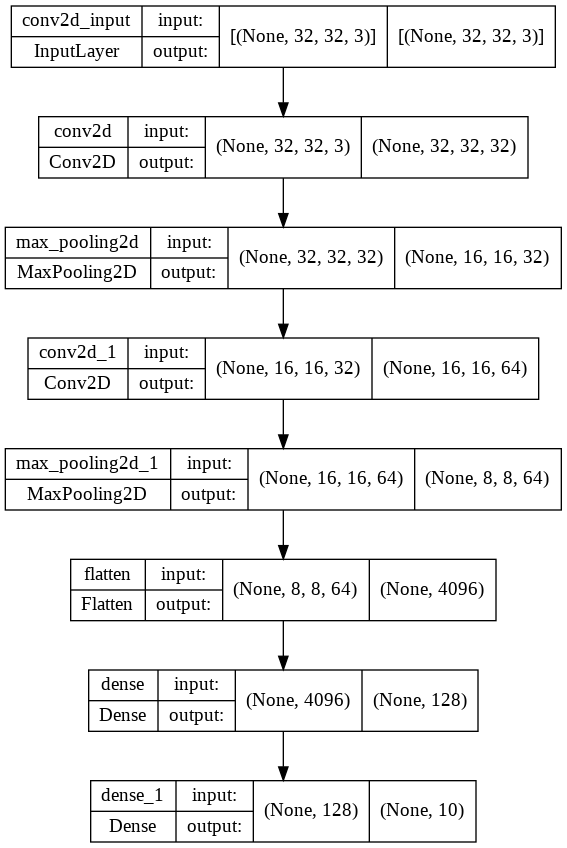

In [14]:
tf.keras.utils.plot_model(model, 'cifarcnn.png', show_shapes=True)

# 訓練模型

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [16]:
train_history=model.fit(
    x=x_train_normalize,y=y_train_onehot,
    validation_split=0.2,batch_size=200,epochs=10,verbose=2)       

Epoch 1/10
200/200 - 13s - loss: 1.6705 - acc: 0.4018 - val_loss: 1.3781 - val_acc: 0.5167 - 13s/epoch - 66ms/step
Epoch 2/10
200/200 - 1s - loss: 1.2695 - acc: 0.5520 - val_loss: 1.2396 - val_acc: 0.5736 - 1s/epoch - 7ms/step
Epoch 3/10
200/200 - 2s - loss: 1.1308 - acc: 0.6028 - val_loss: 1.1060 - val_acc: 0.6172 - 2s/epoch - 8ms/step
Epoch 4/10
200/200 - 2s - loss: 1.0279 - acc: 0.6423 - val_loss: 1.0463 - val_acc: 0.6412 - 2s/epoch - 8ms/step
Epoch 5/10
200/200 - 2s - loss: 0.9560 - acc: 0.6681 - val_loss: 1.0059 - val_acc: 0.6550 - 2s/epoch - 8ms/step
Epoch 6/10
200/200 - 2s - loss: 0.9010 - acc: 0.6875 - val_loss: 0.9795 - val_acc: 0.6638 - 2s/epoch - 8ms/step
Epoch 7/10
200/200 - 2s - loss: 0.8624 - acc: 0.7017 - val_loss: 0.9597 - val_acc: 0.6698 - 2s/epoch - 8ms/step
Epoch 8/10
200/200 - 2s - loss: 0.8217 - acc: 0.7165 - val_loss: 0.9453 - val_acc: 0.6772 - 2s/epoch - 8ms/step
Epoch 9/10
200/200 - 2s - loss: 0.7910 - acc: 0.7265 - val_loss: 0.9353 - val_acc: 0.6802 - 2s/epoch 

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_key,valid_key):
    plt.plot(train_history.history[train_key],'--')
    plt.plot(train_history.history[valid_key])
    plt.title('Train History')
    plt.ylabel(train_key)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

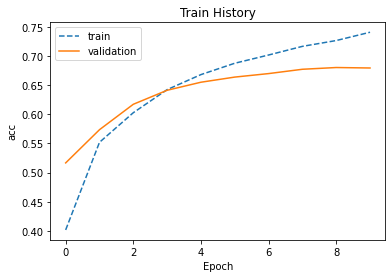

In [18]:
show_train_history(train_history,'acc','val_acc')

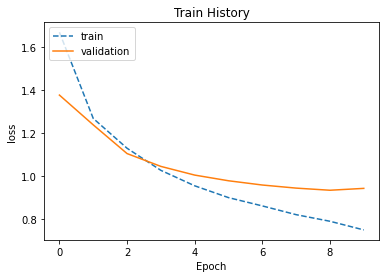

In [19]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [20]:
scores = model.evaluate(x_test_normalize, y_test_onehot,verbose=2)

313/313 - 1s - loss: 0.9353 - acc: 0.6793 - 1s/epoch - 3ms/step


In [21]:
print('test_loss=',scores[0],'test_acc=',scores[1])

test_loss= 0.9353065490722656 test_acc= 0.6793000102043152


# 進行預測

In [22]:
probability = model.predict(x_test_normalize)

In [23]:
prediction=tf.argmax(probability, axis=-1).numpy() 

In [24]:
prediction

array([3, 8, 8, ..., 5, 1, 7])

# 查看預測結果

In [25]:
import matplotlib.pyplot as plt 

In [26]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
      5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [27]:
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= str(idx)+',' +label_dict[labels[idx]]
        if len(prediction)>0:
            title+="=>"+label_dict[prediction[idx]]
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

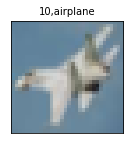

In [28]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              [],idx=10,num=1)

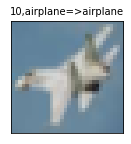

In [29]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=10,num=1)

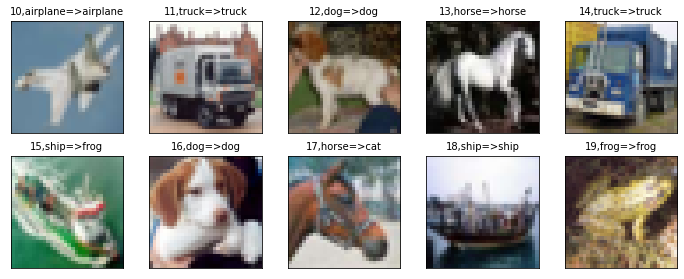

In [30]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=10,num=10)

# 查看預測機率

In [31]:
def show_predicted_probability(
    images,labels,prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary') 
  plt.show()
  if len(labels)>0:print('label:',label_dict[labels[idx]])
  if len(prediction)>0:print('predict:',label_dict[prediction[idx]])
  for i in range(10):
    print('%-10s Probability:%.9f'%(label_dict[i],probability[idx][i]))     

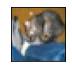

label: cat
predict: cat
airplane   Probability:0.001126739
automobile Probability:0.000087255
bird       Probability:0.006542149
cat        Probability:0.817417026
deer       Probability:0.003767553
dog        Probability:0.148545071
frog       Probability:0.002873804
horse      Probability:0.000873559
ship       Probability:0.018192245
truck      Probability:0.000574681


In [32]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,0) 

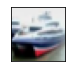

label: ship
predict: ship
airplane   Probability:0.270053118
automobile Probability:0.210100964
bird       Probability:0.000010167
cat        Probability:0.000007175
deer       Probability:0.000000783
dog        Probability:0.000000233
frog       Probability:0.000001410
horse      Probability:0.000000414
ship       Probability:0.510083735
truck      Probability:0.009741980


In [33]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,1) 

# confusion matrix

In [34]:
import pandas as pd

In [35]:
cm=pd.crosstab(index=y_test_label,columns=prediction,
       rownames=['label'],colnames=['predict'])

In [36]:
cm

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,768,6,74,10,15,5,6,13,60,43
1,68,666,17,4,5,7,8,9,19,197
2,68,3,603,37,121,43,46,55,7,17
3,38,6,134,392,118,145,81,51,13,22
4,26,2,79,40,694,18,33,89,13,6
5,22,1,106,119,79,543,23,83,9,15
6,16,1,62,32,94,19,747,12,6,11
7,22,0,39,21,60,45,5,794,3,11
8,105,35,21,8,10,5,6,9,754,47


#heapmap cm

In [37]:
import numpy as np

In [38]:
cm_mat=cm.to_numpy()

In [39]:
cm_mat

array([[768,   6,  74,  10,  15,   5,   6,  13,  60,  43],
       [ 68, 666,  17,   4,   5,   7,   8,   9,  19, 197],
       [ 68,   3, 603,  37, 121,  43,  46,  55,   7,  17],
       [ 38,   6, 134, 392, 118, 145,  81,  51,  13,  22],
       [ 26,   2,  79,  40, 694,  18,  33,  89,  13,   6],
       [ 22,   1, 106, 119,  79, 543,  23,  83,   9,  15],
       [ 16,   1,  62,  32,  94,  19, 747,  12,   6,  11],
       [ 22,   0,  39,  21,  60,  45,   5, 794,   3,  11],
       [105,  35,  21,   8,  10,   5,   6,   9, 754,  47],
       [ 58,  36,  16,   5,   4,   5,   8,  19,  17, 832]])

In [40]:
cm_mat.sum(axis=0)

array([1191,  756, 1151,  668, 1200,  835,  963, 1134,  901, 1201])

In [41]:
cm_mat.sum(axis=1)[:, np.newaxis]

array([[1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000]])

In [42]:
cm_norm = np.around(cm_mat.astype('float') / 
           cm_mat.sum(axis=1)[:, np.newaxis], 
           decimals=3)

In [43]:
cm_norm 

array([[0.768, 0.006, 0.074, 0.01 , 0.015, 0.005, 0.006, 0.013, 0.06 ,
        0.043],
       [0.068, 0.666, 0.017, 0.004, 0.005, 0.007, 0.008, 0.009, 0.019,
        0.197],
       [0.068, 0.003, 0.603, 0.037, 0.121, 0.043, 0.046, 0.055, 0.007,
        0.017],
       [0.038, 0.006, 0.134, 0.392, 0.118, 0.145, 0.081, 0.051, 0.013,
        0.022],
       [0.026, 0.002, 0.079, 0.04 , 0.694, 0.018, 0.033, 0.089, 0.013,
        0.006],
       [0.022, 0.001, 0.106, 0.119, 0.079, 0.543, 0.023, 0.083, 0.009,
        0.015],
       [0.016, 0.001, 0.062, 0.032, 0.094, 0.019, 0.747, 0.012, 0.006,
        0.011],
       [0.022, 0.   , 0.039, 0.021, 0.06 , 0.045, 0.005, 0.794, 0.003,
        0.011],
       [0.105, 0.035, 0.021, 0.008, 0.01 , 0.005, 0.006, 0.009, 0.754,
        0.047],
       [0.058, 0.036, 0.016, 0.005, 0.004, 0.005, 0.008, 0.019, 0.017,
        0.832]])

In [44]:
class_names =["airplane","automobile","bird","cat","deer",
        "dog","frog","horse","ship","truck"]
cm_df = pd.DataFrame(cm_norm,index = class_names,columns = class_names)

In [45]:
cm_df

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,0.768,0.006,0.074,0.010,0.015,0.005,0.006,0.013,0.060,0.043
automobile,0.068,0.666,0.017,0.004,0.005,0.007,0.008,0.009,0.019,0.197
bird,0.068,0.003,0.603,0.037,0.121,0.043,0.046,0.055,0.007,0.017
cat,0.038,0.006,0.134,0.392,0.118,0.145,0.081,0.051,0.013,0.022
deer,0.026,0.002,0.079,0.040,0.694,0.018,0.033,0.089,0.013,0.006
dog,0.022,0.001,0.106,0.119,0.079,0.543,0.023,0.083,0.009,0.015
frog,0.016,0.001,0.062,0.032,0.094,0.019,0.747,0.012,0.006,0.011
horse,0.022,0.000,0.039,0.021,0.060,0.045,0.005,0.794,0.003,0.011
ship,0.105,0.035,0.021,0.008,0.010,0.005,0.006,0.009,0.754,0.047
truck,0.058,0.036,0.016,0.005,0.004,0.005,0.008,0.019,0.017,0.832


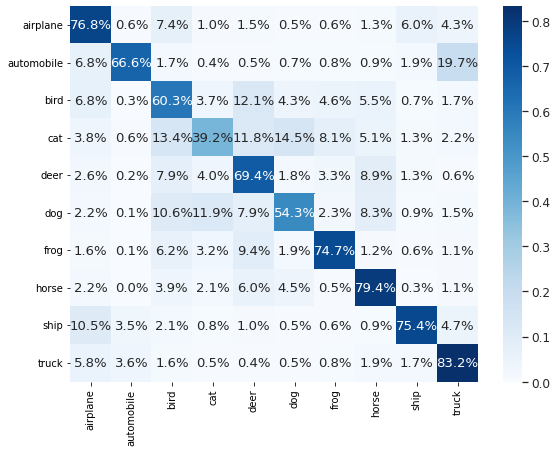

In [46]:
import seaborn as sns
figure = plt.figure(figsize=(8, 6))
plt.ylabel('Label')
plt.xlabel('Predicted')
plt.tight_layout()
sns.set(font_scale=1.1)
sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues,fmt='.1%')
plt.show()

#heatmap_confusion_matrix

In [47]:
class_names =["airplane","automobile","bird","cat","deer",
       "dog","frog","horse","ship","truck"]
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
def plot_heatmap_confusion_matrix(cm_np):
  cm_norm = np.around(
      cm_np.astype('float') / 
      cm_np.sum(axis=1)[:, np.newaxis],decimals=3)
  cm_df = pd.DataFrame(cm_norm,index = class_names,columns = class_names)
  figure = plt.figure(figsize=(8, 6))
  plt.tight_layout();sns.set(font_scale=1)
  plt.ylabel('Label');plt.xlabel('Predicted')
  sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues,fmt='.1%')
  return figure

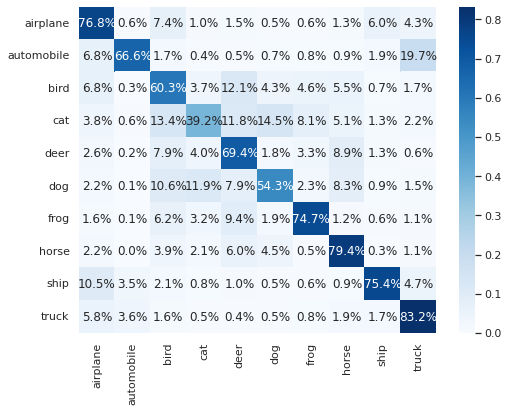

In [48]:
figure = plot_heatmap_confusion_matrix(cm.to_numpy())

In [49]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})

In [50]:
df[:5]

,label,predict
0,3,3
1,8,8
2,8,8
3,0,0
4,6,4


In [51]:
df[(df.label==5)&(df.predict==3)]

,label,predict
158,5,3
232,5,3
238,5,3
321,5,3
474,5,3
...,...,...
9657,5,3
9804,5,3
9823,5,3
9918,5,3


# 查看預測錯誤資料

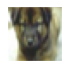

label: dog
predict: dog
airplane   Probability:0.000252125
automobile Probability:0.000022464
bird       Probability:0.113148652
cat        Probability:0.404496312
deer       Probability:0.011739184
dog        Probability:0.439181894
frog       Probability:0.028176777
horse      Probability:0.001875698
ship       Probability:0.000974978
truck      Probability:0.000131859


In [52]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,33)

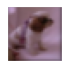

label: dog
predict: dog
airplane   Probability:0.015477118
automobile Probability:0.000512378
bird       Probability:0.056126017
cat        Probability:0.337239027
deer       Probability:0.035534233
dog        Probability:0.458302855
frog       Probability:0.007025360
horse      Probability:0.082438357
ship       Probability:0.001129818
truck      Probability:0.006214851


In [53]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,178)